In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#import tensorflow as tf

# read raw data, 42000 images, each image 28x28, first colum is the real digital number

In [2]:
filename="../test python/train.csv"
data=pd.read_csv(filename)
print (data.shape)
images=data.iloc[:,1:].values
realdig=data.iloc[:,0].values
images=images.astype(np.float)
images=np.multiply(images,1.0/255.0)
images.shape


(42000, 785)


(42000, 784)

In [3]:
image_size=images.shape[1]
image_width=image_height=np.ceil(np.sqrt(image_size)).astype(np.uint8)
print('width=>{0},height=>{1}'.format(image_width,image_height))

width=>28,height=>28


plot the individual image with its real number

6

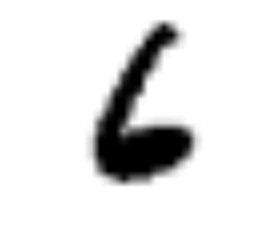

In [23]:
def imshow(img):
    image_one=img.reshape(image_height, image_width)
    plt.axis('off')
    plt.imshow(image_one, cmap=cm.binary)
    
Num=876
imshow(images[Num])
realdig[Num]

(28, 56)


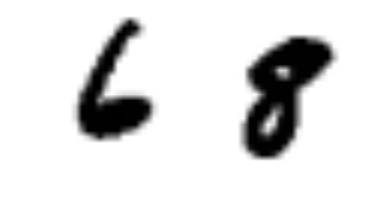

In [138]:
def imshowmore(img,img2):
    image_one=img.reshape(image_height, image_width)
    image_two=img2.reshape(image_height, image_width)
    image_new=np.append(image_one,image_two,axis=1)
    plt.axis('off')
    plt.imshow(image_new, cmap=cm.binary)
    print(image_new.shape)

imshowmore(images[Num], images[Num+2])

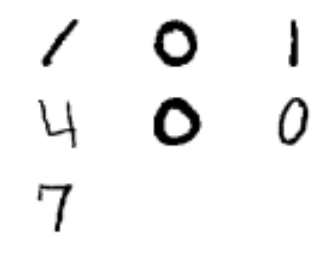

In [20]:
def imshow_multiple(imgs):
    n = len(imgs)
    sqrt_n = int(np.ceil(np.sqrt(n)))
    fig, axs = plt.subplots(sqrt_n, sqrt_n)
    axs_flat = axs.flatten()
    for img, ax in zip(imgs, axs_flat):
        ax.axis("off")
        ax.imshow(img.reshape((image_height, image_width)), cmap=cm.binary)
    for ax in axs_flat[n:]:
        fig.delaxes(ax)

imshow_multiple(images[:7])

there are 10 different numbers in total, creat a vector matrix for each real number/image.
each vector is a ten elements array,  the index of element "1" coresponds to the real number 

In [21]:
#dig_count=np.unique(realdig).shape[0]
#dig_count

10

In [39]:
#num_dig=realdig.shape[0]
#index_offset=np.arange(num_dig)*dig_count
#dig_vector=np.zeros((num_dig,dig_count))
#dig_vector.flat[index_offset+realdig.ravel()]=1
#dig_vector=dig_vector.astype(int)

print("image {0}'s real number=> {2} vector =>{1}".format(Num,dig_vector[Num], realdig[Num]))

image 876's real number=> 6 vector =>[0 0 0 0 0 0 1 0 0 0]


split the images into two parts, small fraction for validation, the rest for training.

In [37]:
validation_size=1000
validation_images=images[:validation_size]
validation_realdig=realdig[:validation_size]
train_images=images[validation_size:]
train_realdig=realdig[validation_size:]
#train_dig_vector=dig_vector[validation_size:]
print('from the {0} th image, we will train {1} images'.format(validation_size,train_images.shape[0]))
#imshow(train_images[Num])
#print(train_realdig[Num])
#train_dig_vector[Num]

from the 1000 th image, we will train 41000 images


# scikit_learn svm

In [38]:
from sklearn import datasets, svm
train_images.shape
train_realdig.shape
LearnNum=svm.SVC()
LearnNum.fit(train_images,train_realdig)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
predictNum=LearnNum.predict(validation_images)

IndexError: tuple index out of range

predicted is [1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 8 0 7 6]


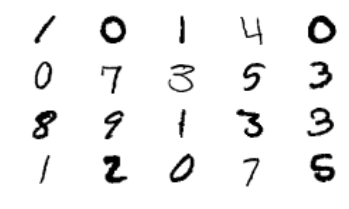

In [84]:
Num=20
print("predicted is {0}".format(predictNum[:Num]))
imshow_multiple(validation_images[:Num])

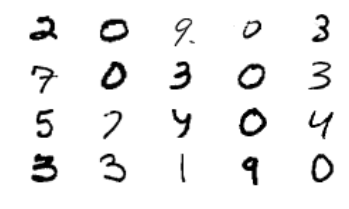

In [123]:
testfile="../test python/test.csv"
testdata=pd.read_csv(testfile)
testdata=testdata.iloc[:,0:].values
testdata=testdata.astype(np.float)
#print(testdata.shape)
testdata=np.multiply(testdata,1.0/255.0)
imshow_multiple(testdata[:20])

In [119]:
Num=300
predictTestNum=LearnNum.predict(testdata[:Num])
predictTestNum

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1,
       5, 7, 4, 2, 7, 7, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7,
       8, 8, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 5, 4, 1, 7, 0, 0, 0, 1, 9, 0,
       1, 6, 5, 8, 8, 2, 8, 3, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0,
       6, 6, 1, 4, 3, 9, 7, 4, 0, 3, 2, 0, 7, 3, 0, 5, 0, 9, 0, 0, 4, 7, 1,
       7, 1, 1, 5, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1,
       5, 0, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3,
       0, 4, 5, 1, 8, 7, 6, 5, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2,
       4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8,
       4, 6, 2, 0, 9, 3, 6, 7, 2, 1, 6, 3, 4, 2, 3, 1, 0, 2, 0, 4, 6, 1, 0,
       0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 5, 9, 7, 1,
       3, 8, 4, 5, 1, 4, 3, 6, 3, 3, 5, 7, 0, 6, 8, 6, 1, 6, 0, 6, 3, 9, 9,
       1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 8, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3,
       3])

predicted is [0 9 2 0 5 3 7 8 9 9 5 7 7 9 9 6 3 0 3 3]


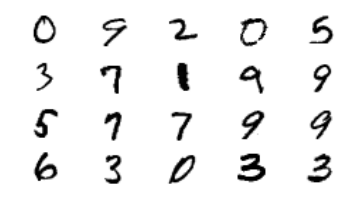

In [126]:

print("predicted is {0}".format(predictTestNum[280:Num]))
imshow_multiple(testdata[280:Num])